In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import zipfile
import io
import os
import numpy as np

In [2]:
url = 'http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv'
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall('world_bank_population')

extracted_files = os.listdir('world_bank_population')

csv_file = [f for f in extracted_files if f.startswith('API_SP.POP.TOTL') and f.endswith('.csv')][0]
csv_file_path = os.path.join('world_bank_population', csv_file)

df_world_bank = pd.read_csv(csv_file_path, skiprows=4)

print(df_world_bank.head())

                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54608.0      55811.0      56682.0      57475.0      58178.0   
1  130692579.0  134169237.0  137835590.0  141630546.0  145605995.0   
2    8622466.0    8790140.0    8969047.0    9157465.0    9355514.0   
3   97256290.0   99314028.0  101445032.0  103667517.0  105959979.0   
4    5357195.0    5441333.0    5521400.0    5599827.0    5673199.0   

          1965  ...         2015         2016         2017         2018  \
0      58782.0  .

In [3]:
years = df_world_bank.columns[4:]
populations = df_world_bank.loc[df_world_bank['Country Name'] == 'World', years].values.flatten()

In [4]:
data_world_population = pd.DataFrame({'Year': years, 'Population': populations})

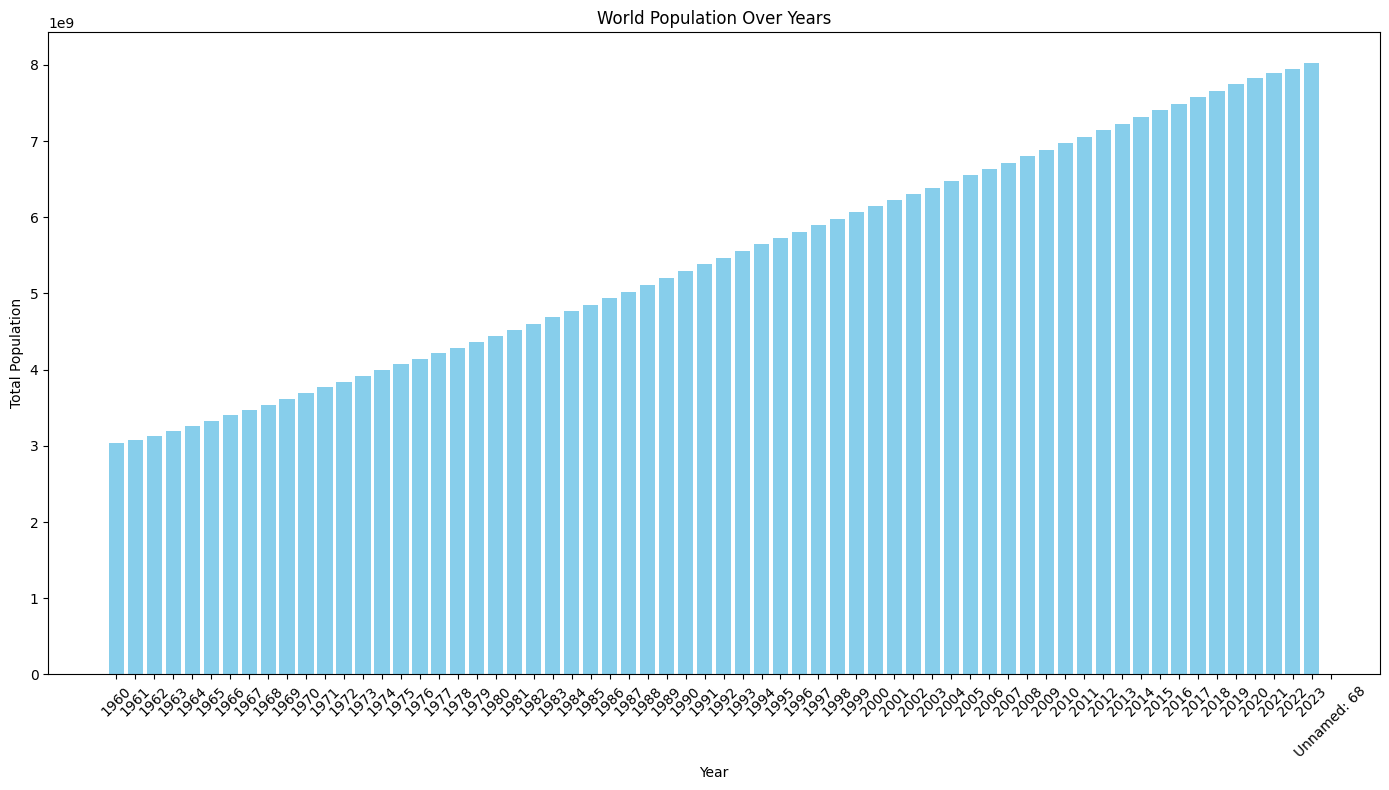

In [5]:
plt.figure(figsize=(14, 8))
plt.bar(data_world_population['Year'], data_world_population['Population'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('World Population Over Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
np.random.seed(42)
n = 1000
ages = np.random.randint(0, 100, size=n)
genders = np.random.choice(['Male', 'Female'], size=n)

In [7]:
df_synthetic = pd.DataFrame({'Age': ages, 'Gender': genders})

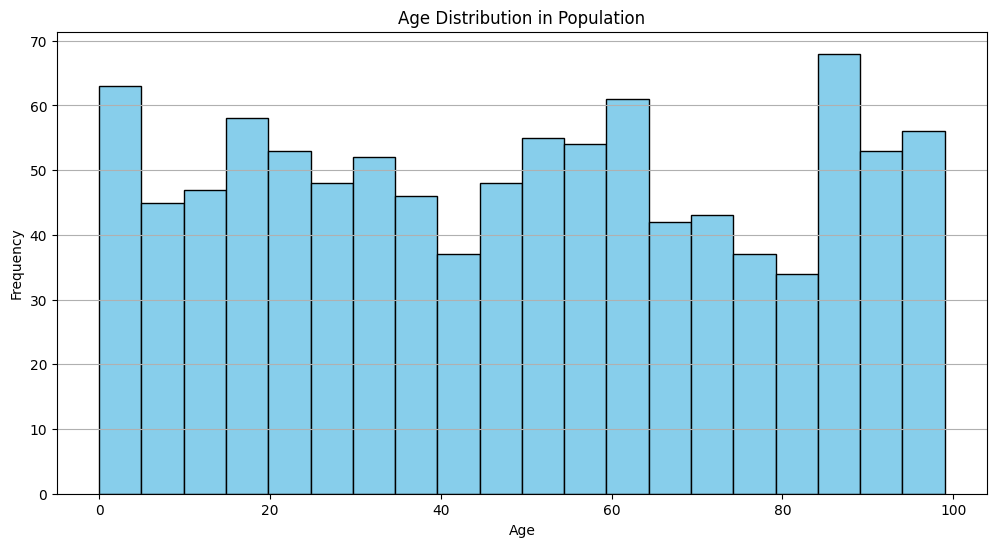

In [8]:
plt.figure(figsize=(12, 6))
plt.hist(df_synthetic['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution in Population')
plt.grid(axis='y')
plt.show()

In [10]:
gender_counts = df_synthetic['Gender'].value_counts()

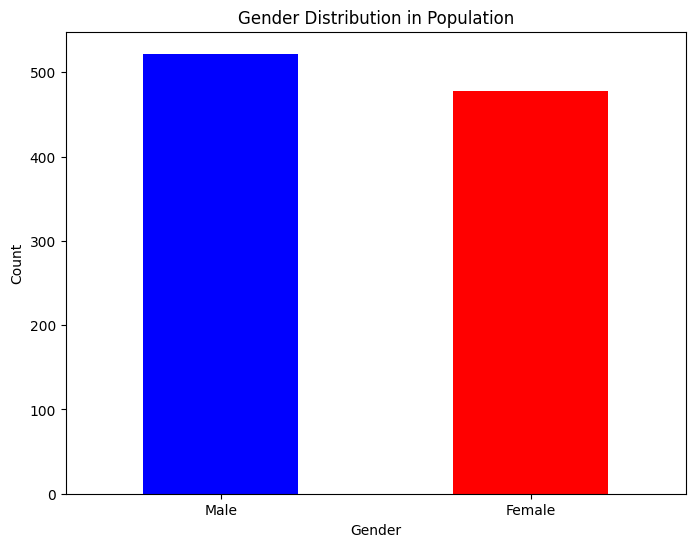

In [11]:
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution in Population')
plt.xticks(rotation=0)
plt.show()